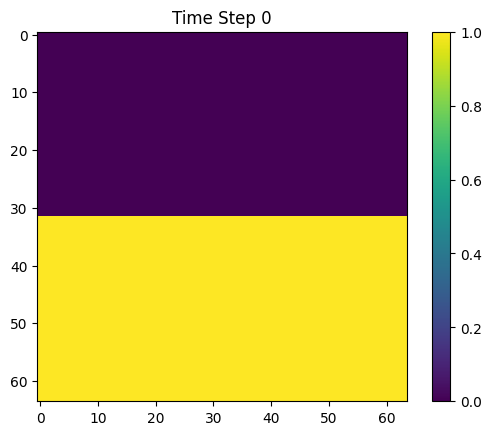

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

%matplotlib inline

k = 1
W, H, T = 64, 64, 20

u = np.zeros([T, W, H])

# initial configuration
u[0, H//2:, :] = 1

kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

def iterate(u_prev):
    return u_prev + k * convolve2d(u_prev, kernel, mode='same', fillvalue=0)

for t in range(T - 1):
    u[t + 1] = iterate(u[t])

du = convolve2d(u[0], kernel, mode='same', fillvalue=0)

# Create a function to update the plot for each frame
def update(frame):
    plt.clf()  # Clear the current figure
    plt.imshow(u[frame], cmap='viridis')  # Plot the current frame
    plt.title(f'Time Step {frame}')  # Set title
    plt.colorbar()  # Add colorbar

# Create the animation
ani = FuncAnimation(plt.gcf(), update, frames=T, interval=100)

HTML(ani.to_jshtml())